In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ghibtools as gh
import pandas as pd
import seaborn as sns
import pingouin as pg
from params import *
from bibliotheque import *
from configuration import base_folder
import os

In [3]:
save_folder = base_folder / 'Figures' / 'stimulus_scoring'

In [4]:
concat = []
for participant in subject_keys:
    ses01_folder = base_folder / 'Data' / f'{participant}' / 'questionnaires' / 'ses01'
    df_participant = pd.read_excel(ses01_folder / f'cotations_odeurs_absolues_{participant}.xlsx')
    concat.append(df_participant)
cotations_absolues_odeurs = pd.concat(concat)

In [5]:
concat = []
for participant in subject_keys:
    ses01_folder = base_folder / 'Data' / f'{participant}' / 'questionnaires' / 'ses01'
    df_participant = pd.read_excel(ses01_folder / f'cotations_musiques_absolues_{participant}.xlsx')
    concat.append(df_participant)
cotations_absolues_musiques = pd.concat(concat)

In [6]:
cotations_absolues_odeurs

,participant,odeur_num,odeur_label,odeur_name,hédonicité_absolue_brute,longueur_totale,hédonicité_absolue
0,P01,1,FO,Feuille d'Olivier,74,100,0.74
1,P01,2,FP,Floral Printanier,85,100,0.85
2,P01,3,R,Rose,26,100,0.26
3,P01,4,PL,Pêche Lavande,40,100,0.40
4,P01,5,FoE,Fleur d'oranger épicé,77,100,0.77
...,...,...,...,...,...,...,...
5,P31,6,FC,Fleur de coton,85,100,0.85
6,P31,7,V,Vanille,92,100,0.92
7,P31,8,BO,Blue Ocean,77,100,0.77
8,P31,9,BE,Bois épicé,57,100,0.57


In [7]:
cotations_absolues_odeurs.describe()

,odeur_num,hédonicité_absolue_brute,longueur_totale,hédonicité_absolue
count,300.00000,300.000000,300.0,300.000000
mean,5.50000,64.590000,100.0,0.645900
std,2.87708,24.568828,0.0,0.245688
min,1.00000,0.000000,100.0,0.000000
25%,3.00000,50.000000,100.0,0.500000
50%,5.50000,66.000000,100.0,0.660000
75%,8.00000,85.250000,100.0,0.852500
max,10.00000,100.000000,100.0,1.000000


In [8]:
cotations_absolues_musiques.describe()

,musique_num,appréciation_absolue,longueur_totale,appréciation_absolue_normalisée,hédonicité_absolue_brute,hédonicité_absolue
count,300.00000,110.000000,300.000000,110.000000,190.000000,190.000000
mean,5.50000,65.345455,101.666667,0.659333,62.236842,0.636526
std,2.87708,27.726527,8.990271,0.251742,26.091652,0.257605
min,1.00000,0.000000,100.000000,0.000000,0.000000,0.000000
25%,3.00000,50.000000,100.000000,0.500000,45.000000,0.490000
50%,5.50000,73.500000,100.000000,0.710000,65.500000,0.690000
75%,8.00000,86.000000,100.000000,0.857500,83.000000,0.837500
max,10.00000,100.000000,150.000000,1.000000,100.000000,1.000000


In [9]:
cotations_absolues_musiques

,participant,musique_num,musique_name,appréciation_absolue,longueur_totale,appréciation_absolue_normalisée,hédonicité_absolue_brute,hédonicité_absolue
0,P01,1,Classic,89.0,150,0.593333,NaN,NaN
1,P01,2,Electro,88.0,150,0.586667,NaN,NaN
2,P01,3,Hard_Rock,5.0,150,0.033333,NaN,NaN
3,P01,4,Jazz,3.0,150,0.020000,NaN,NaN
4,P01,5,Metal,50.0,150,0.333333,NaN,NaN
...,...,...,...,...,...,...,...,...
5,P31,6,Pop,NaN,100,NaN,80.0,0.80
6,P31,7,Raga,NaN,100,NaN,29.0,0.92
7,P31,8,Rap_Freeze,NaN,100,NaN,89.0,0.89
8,P31,9,Rap_Luv,NaN,100,NaN,66.0,0.66


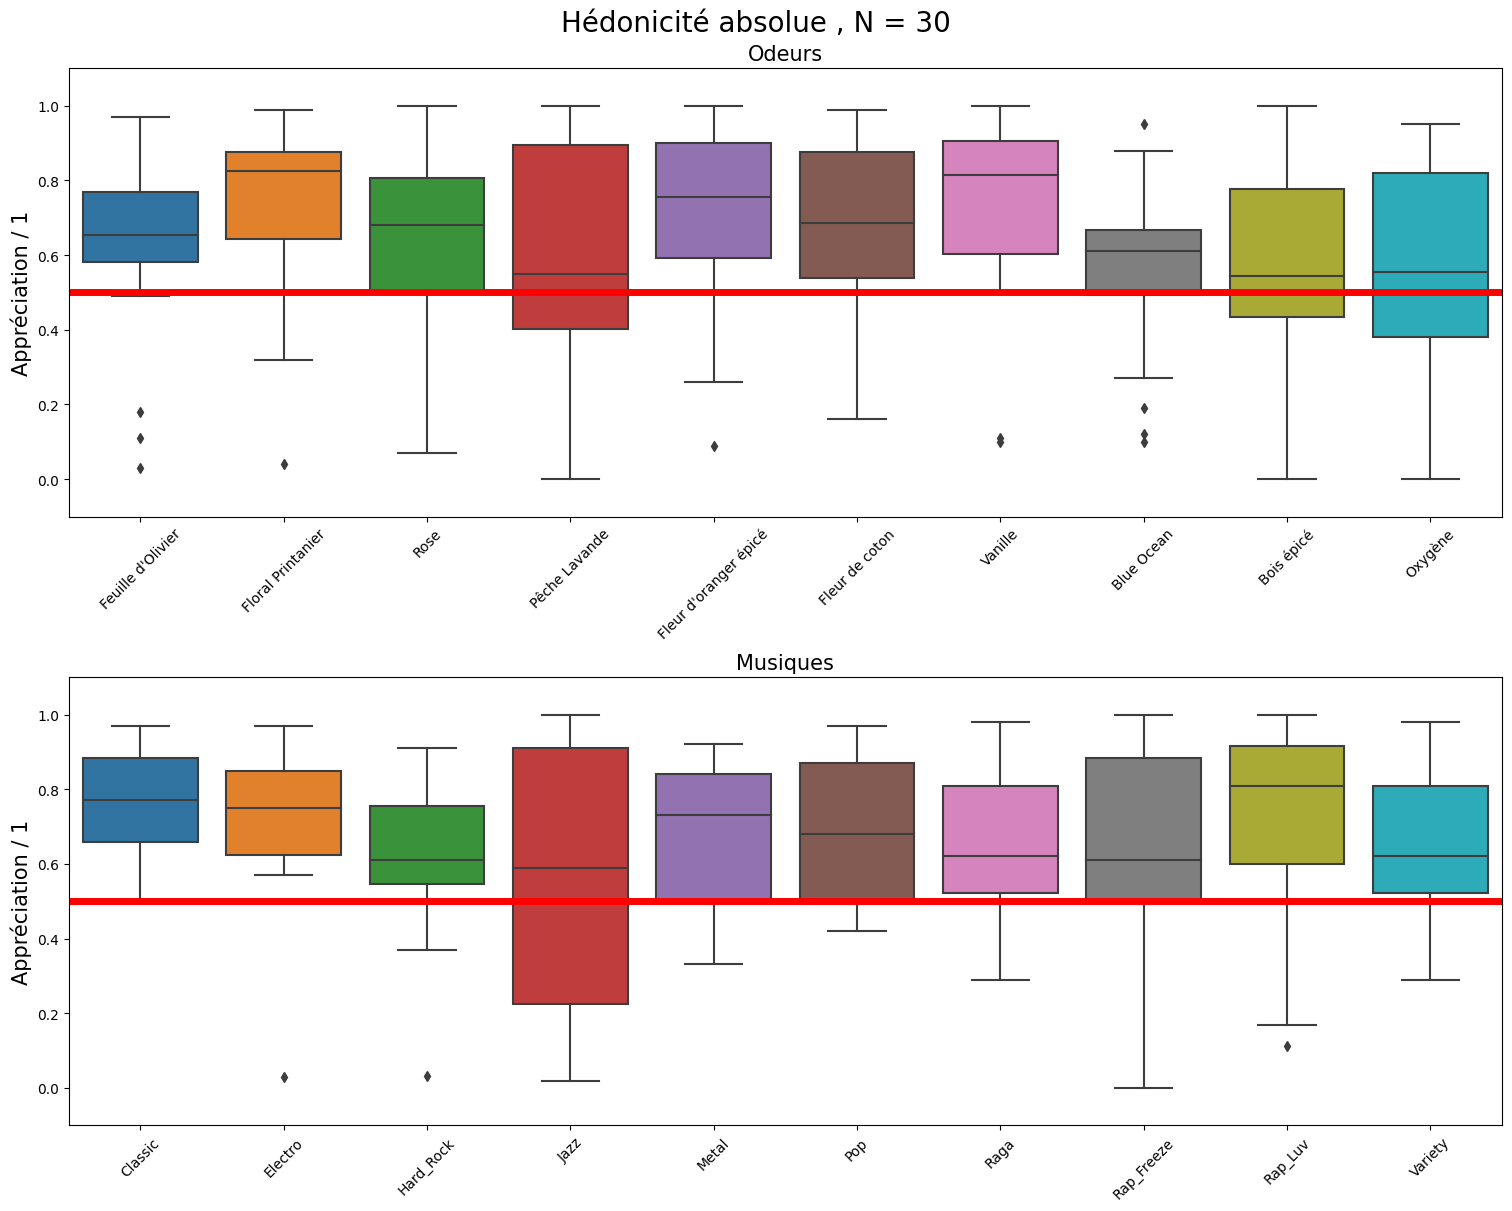

In [10]:
fig, axs = plt.subplots(nrows =2, figsize = (15,12), constrained_layout = True)

N = cotations_absolues_musiques['participant'].unique().size

fig.suptitle(f'Hédonicité absolue , N = {N}', fontsize = 20)

ax = axs[0]
sns.boxplot(data=cotations_absolues_odeurs, x='odeur_name', y = 'hédonicité_absolue', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
ax.axhline(0.5, color ='r', lw = 5)
ax.set_title('Odeurs', fontsize = 15)
ax.set_ylabel('Appréciation / 1', fontsize = 15)
ax.set_xlabel('')
ax.set_ylim(-0.1,1.1)

ax = axs[1]
sns.boxplot(data=cotations_absolues_musiques, x='musique_name', y = 'appréciation_absolue_normalisée', ax=ax)
ax.axhline(0.5, color ='r', lw = 5)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
ax.set_title('Musiques', fontsize = 15)
ax.set_ylabel('Appréciation / 1', fontsize = 15)
ax.set_xlabel('')
ax.set_ylim(-0.1,1.1)

file = save_folder / 'hédonicité_absolue.png'

fig.savefig(file, bbox_inches = 'tight', dpi = 300)

In [11]:
concat = []
for participant in subject_keys:
    ses01_folder = base_folder / 'Data' / f'{participant}' / 'questionnaires' / 'ses01'
    df_participant = pd.read_excel(ses01_folder /  f'cotations_odeurs_relatives_{participant}_bis.xlsx')
    concat.append(df_participant)
cotations_relatives_odeurs = pd.concat(concat)

In [12]:
concat = []
for participant in subject_keys:
    ses01_folder = base_folder / 'Data' / f'{participant}' / 'questionnaires' / 'ses01'
    df_participant = pd.read_excel(ses01_folder /  f'cotations_musiques_relatives_{participant}_bis.xlsx', index_col = 0)
    concat.append(df_participant)
cotations_relatives_musiques = pd.concat(concat)

In [13]:
cotations_relatives_musiques

,participant,musique_num,musique_name,hédonicité_absolue_brute,hédonicité_absolue,longueur_totale,intensité_relative_brute,intensité_relative,hédonicité_relative_brute,hédonicité_relative,eveil_relatif_brute,eveil_relatif,familarité_relative_brute,familiarité_relative,valence_émotionnelle_relative_brute,valence_émotionnelle_relative
0,P01,1,Classic,89,0.89,100,31,0.31,87,0.87,59,0.59,90,0.90,78,0.78
1,P01,2,Electro,88,0.88,100,63,0.63,72,0.72,31,0.31,62,0.62,87,0.87
2,P01,10,Variety,82,0.82,100,74,0.74,80,0.80,79,0.79,72,0.72,64,0.64
0,P02,1,Classic,97,0.97,100,17,0.17,89,0.89,9,0.09,99,0.99,93,0.93
1,P02,6,Pop,97,0.97,100,90,0.90,6,0.06,93,0.93,13,0.13,4,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,P30,2,Electro,100,1.00,100,98,0.98,97,0.97,99,0.99,100,1.00,83,0.83
2,P30,5,Metal,93,0.93,100,95,0.95,93,0.93,95,0.95,55,0.55,80,0.80
0,P31,5,Metal,97,0.97,100,81,0.81,97,0.97,95,0.95,88,0.88,79,0.79
1,P31,8,Rap Freeze,89,0.89,100,24,0.24,89,0.89,24,0.24,68,0.68,27,0.27


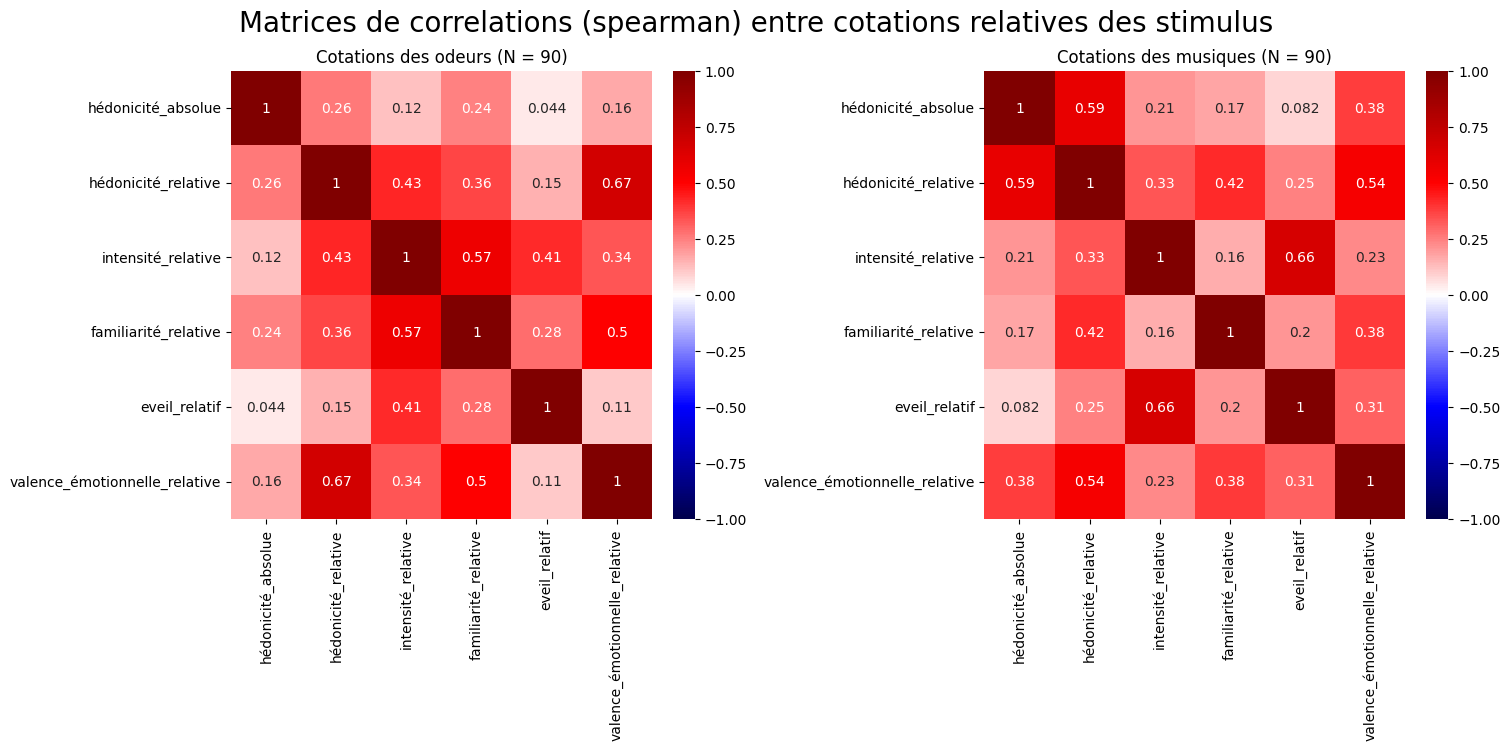

In [14]:
metrics = ['hédonicité_absolue','hédonicité_relative','intensité_relative','familiarité_relative','eveil_relatif','valence_émotionnelle_relative']
corr_method = 'spearman'

fig, axs = plt.subplots(ncols =2 , figsize = (15,7), constrained_layout = True)
fig.suptitle(f'Matrices de correlations ({corr_method}) entre cotations relatives des stimulus', fontsize = 20, y = 1.05)



ax = axs[0]
N = cotations_relatives_odeurs.shape[0]
sns.heatmap(cotations_relatives_odeurs.loc[:,metrics].corr(corr_method,numeric_only = True), cmap = 'seismic', vmin = -1, vmax =1, annot = True, ax=ax)
ax.set_title(f'Cotations des odeurs (N = {N})')

ax = axs[1]
N = cotations_relatives_musiques.shape[0]
sns.heatmap(cotations_relatives_musiques.loc[:,metrics].corr(corr_method,numeric_only = True), cmap = 'seismic', vmin = -1, vmax =1, annot = True, ax=ax)
ax.set_title(f'Cotations des musiques (N = {N})')

file = save_folder / f'matrice_correlation_{corr_method}.png'

fig.savefig(file, bbox_inches = 'tight')


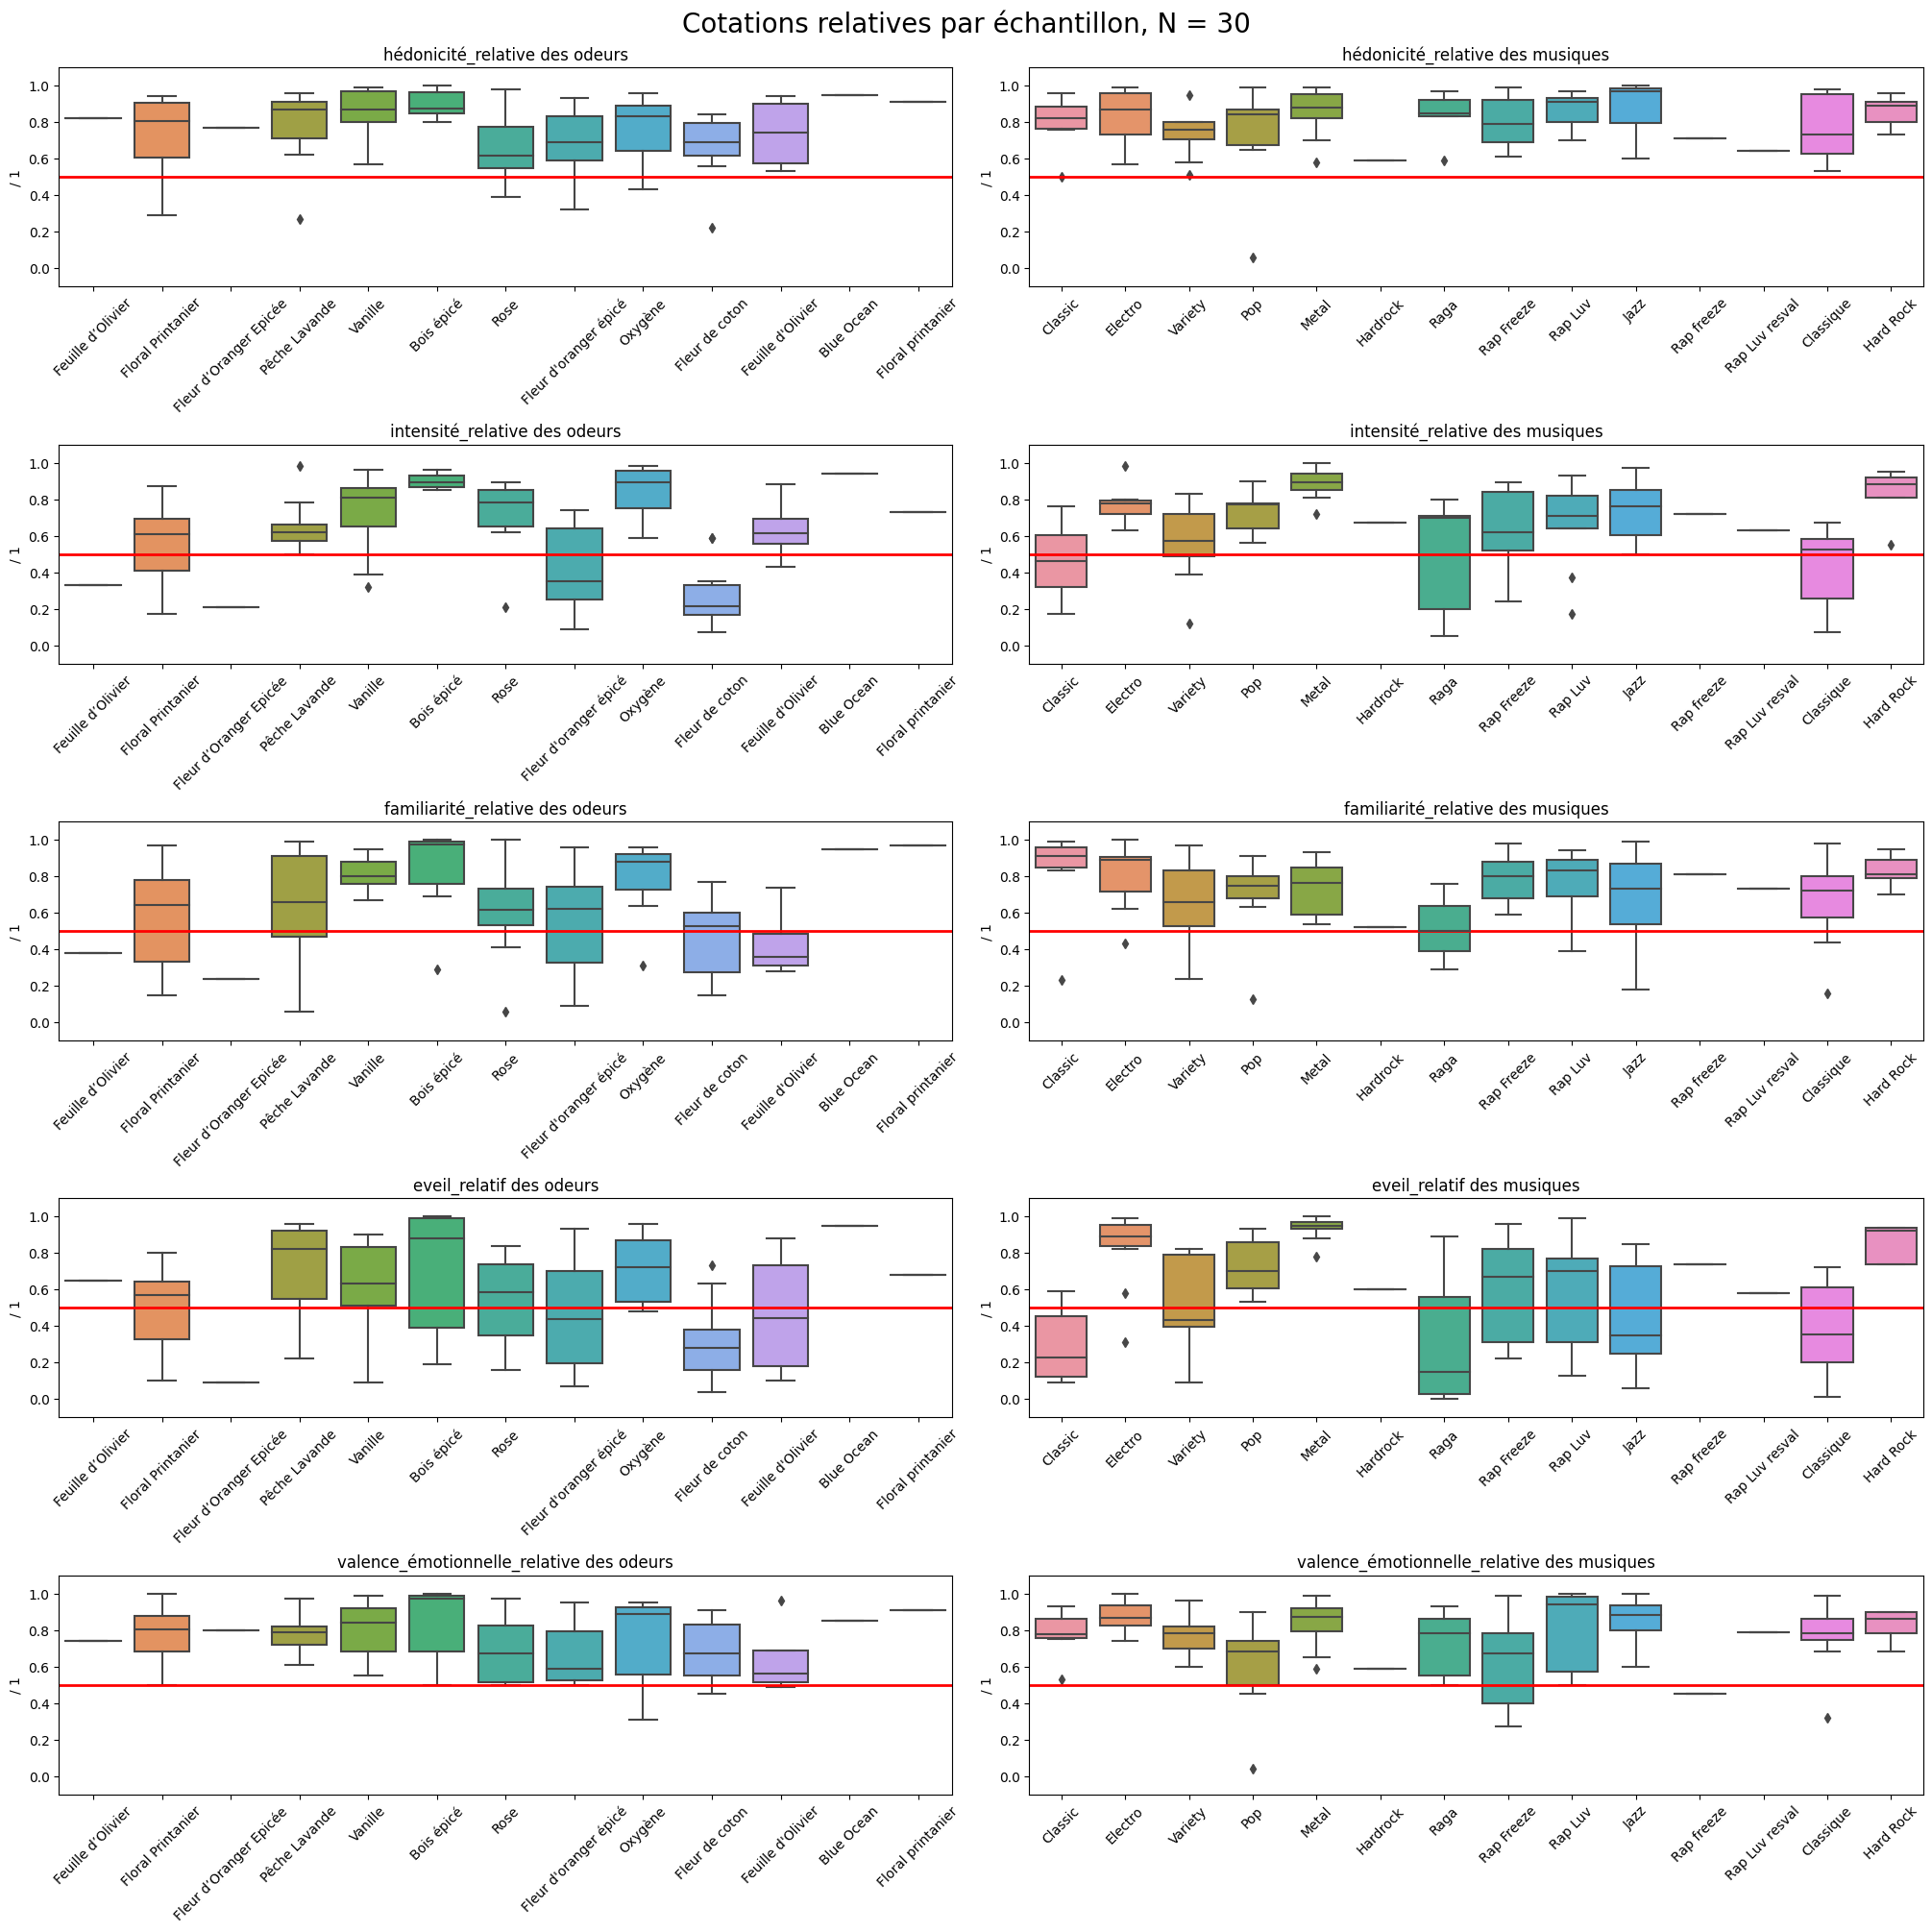

In [15]:
metrics = ['hédonicité_relative','intensité_relative','familiarité_relative','eveil_relatif','valence_émotionnelle_relative']

fig, axs = plt.subplots(nrows = len(metrics), ncols = 2, figsize = (20,20), constrained_layout = True)

N = cotations_relatives_odeurs['participant'].unique().size

fig.suptitle(f'Cotations relatives par échantillon, N = {N}', fontsize = 20)

for r, metric in enumerate(metrics):
    for c, cotations_relatives in enumerate([cotations_relatives_odeurs, cotations_relatives_musiques]):
        
        ax = axs[r,c]
        
        if c == 0:
            stim = 'odeurs'
            x_label = 'odeur_name'
        else:
            stim = 'musiques'
            x_label = 'musique_name'
        
        
            
        sns.boxplot(data=cotations_relatives, x=x_label, y = metric, ax=ax)
        ax.set_title(f'{metric} des {stim}')
        ax.axhline(0.5, color ='r', lw = 2)
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
        ax.set_ylim(-0.1,1.1)
        ax.set_ylabel('/ 1')
        ax.set_xlabel('')
        
file = save_folder / f'cotations_relatives_ses01.png'


fig.savefig(file, bbox_inches = 'tight')


In [16]:
cotations_relatives_musiques

,participant,musique_num,musique_name,hédonicité_absolue_brute,hédonicité_absolue,longueur_totale,intensité_relative_brute,intensité_relative,hédonicité_relative_brute,hédonicité_relative,eveil_relatif_brute,eveil_relatif,familarité_relative_brute,familiarité_relative,valence_émotionnelle_relative_brute,valence_émotionnelle_relative
0,P01,1,Classic,89,0.89,100,31,0.31,87,0.87,59,0.59,90,0.90,78,0.78
1,P01,2,Electro,88,0.88,100,63,0.63,72,0.72,31,0.31,62,0.62,87,0.87
2,P01,10,Variety,82,0.82,100,74,0.74,80,0.80,79,0.79,72,0.72,64,0.64
0,P02,1,Classic,97,0.97,100,17,0.17,89,0.89,9,0.09,99,0.99,93,0.93
1,P02,6,Pop,97,0.97,100,90,0.90,6,0.06,93,0.93,13,0.13,4,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,P30,2,Electro,100,1.00,100,98,0.98,97,0.97,99,0.99,100,1.00,83,0.83
2,P30,5,Metal,93,0.93,100,95,0.95,93,0.93,95,0.95,55,0.55,80,0.80
0,P31,5,Metal,97,0.97,100,81,0.81,97,0.97,95,0.95,88,0.88,79,0.79
1,P31,8,Rap Freeze,89,0.89,100,24,0.24,89,0.89,24,0.24,68,0.68,27,0.27


In [23]:
concat_musique = cotations_relatives_musiques.drop(columns = ['musique_num','musique_name'])
concat_musique['Stimulus'] = 'Musique'
concat_odeur = cotations_relatives_odeurs.drop(columns = ['odeur_num','odeur_label','odeur_name','Unnamed: 0'])
concat_odeur['Stimulus'] = 'Odeur'
both_relatives = pd.concat([concat_musique, concat_odeur])

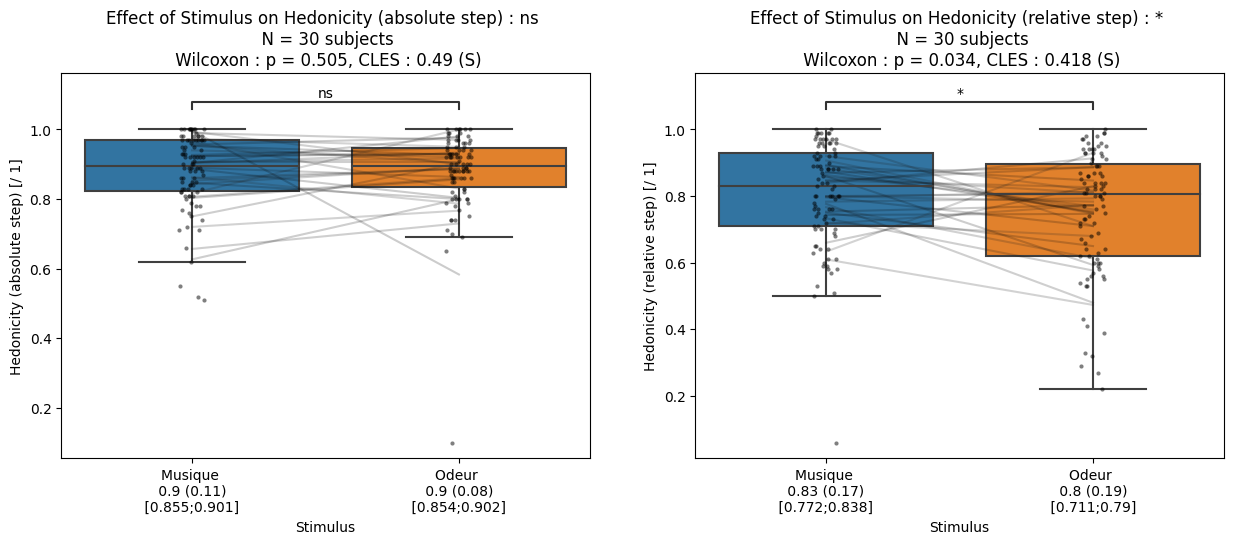

In [32]:
fig, axs = plt.subplots(ncols = 2, figsize = (15,5))
ax = axs[0]
gh.auto_stats(df = both_relatives,
              predictor = 'Stimulus',
              outcome = 'hédonicité_absolue',
              ax=ax,
              subject = 'participant',
              outcome_clean_label = 'Hedonicity (absolute step)',
              outcome_unit = '/ 1'
             )


ax = axs[1]
gh.auto_stats(df = both_relatives,
              predictor = 'Stimulus',
              outcome = 'hédonicité_relative',
              ax=ax,
              subject = 'participant',
              outcome_clean_label = 'Hedonicity (relative step)',
              outcome_unit = '/ 1'
             )

fig.savefig(base_folder / 'Figures' / 'stimulus_scoring' / 'absolute_and_relative_hedo_comparison.png', dpi = 300, bbox_inches = 'tight')